# Practice Case Clustering - German Credit Data
## Febi Andika Dani Fajar Suryawan

## 1. Business Understanding

German Credit adalah sebuah perusahaan yang bergerak dalam penyediaan jasa peminjaman dana kepada masyarakat. Saat ini, German Credit berusaha untuk dapat mengantisipasi adanya kerugian dikarenakan adanya pembayaran kredit yang macet. Oleh karena itu, German Credit melakukan segmentasi risiko pembayaran kredit terhadap pelanggan German Credit.

## 2. Preparasi Data

Data yang dimiliki adalah data finansial yang dimiliki oleh German Credit yang berisi 1000 baris dan 10 kolom yang terdiri dari variabel ID, Age, Sex, Job, Housing, Saving accounts, Checking account, Credit amount, Duration dan Purpose.

In [1]:
# Memanggil library yang akan digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Memanggil dataset
df=pd.read_csv('german_credit_data.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [156]:
# Mengecek ukuran dataset
df.shape

(1000, 10)

In [3]:
# Melihat statistika deskriptif dari data
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [4]:
# Mengecek informasi tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [5]:
# Mengecek adanya missing values tiap kolom data
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

Disini saya menambahkan suatu variabel Payment yang merupakan hasil pembagian dari variabel Credit amount dan variabel Duration yang melambangkan besaran pembayaran yang dilakukan oleh pelanggan tiap bulannya. Pembuatan variabel baru ini dikarenakan adanya kecurigaan bahwa semakin tinggi tingkat pembayaran kredit tiap bulan oleh pelanggan semakin tinggi risiko kredit macet yang dilakukan oleh pelanggan. Variabel Payment ini yang kemudian digunakan untuk membuat segmentasi risiko pembayaran kredit pelanggan.

In [6]:
# Mengambil data dengan kolom bertipe numerik sebagai variabel yang akan digunakan untuk clustering segmentasi pelanggan
data=df[['Age','Credit amount','Duration']]
data['Payment']=data['Credit amount'] / data['Duration']
data1=np.log(data[['Age','Payment']])
X=np.asarray(data1)

C:\Users\febian064178\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## 3. Clustering
Dalam proses pembuatan model untuk segmentasi pelanggan German Credit akan digunakan metode K-Means, Hierarki, dan DBSCAN untuk membuat model clustering. Selanjutnya akan dipilih metode mana yang paling cocok dan sesuai untuk membuat segmentasi pelanggan dari German Credit.

### Metode K-Means

Pada model K-Means, langkah pertama yang perlu dilakukan adalah menentukan nilai k sebagai jumlah kluster dengan menlihat scree plot dan nilai silhouette. 

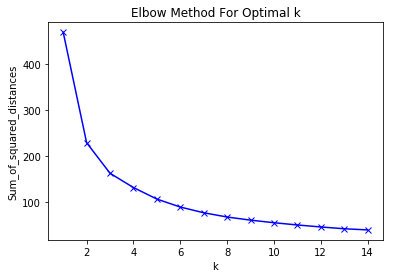

In [41]:
# Menentukan nilai K dengan scree plot
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Dari scree plot di atas diperoleh bahwa nilai k optimal untuk menentukan banyaknya cluster pelanggan adalah 3 atau 4. Selanjutnya akan dicek silhouette score dari tiap banyaknya n cluster. 

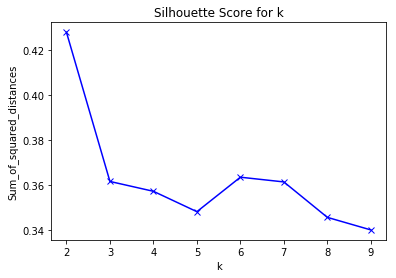

In [42]:
# Menentukan silhouette score dari tiap n cluster
hasil=[]
from sklearn.metrics import silhouette_score
range_n_clusters= list(range(2,10))
for n_clusters in range_n_clusters:
    clusterer= KMeans(n_clusters=n_clusters)
    preds=clusterer.fit_predict(X)
    centers=clusterer.cluster_centers_
    
    score=silhouette_score (X,preds,metric='euclidean')
    hasil.append(score)
plt.plot(range_n_clusters,hasil,'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Silhouette Score for k')
plt.show()

Dari nilai silhouette diatas, maka dipilih nilai k = 3. Selanjutnya akan dibangun model K-Means dengan jumlah cluster 3.

In [140]:
# Melakukan aktivasi algoritma K-Means
kmeans = KMeans(n_clusters=3,random_state=1)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

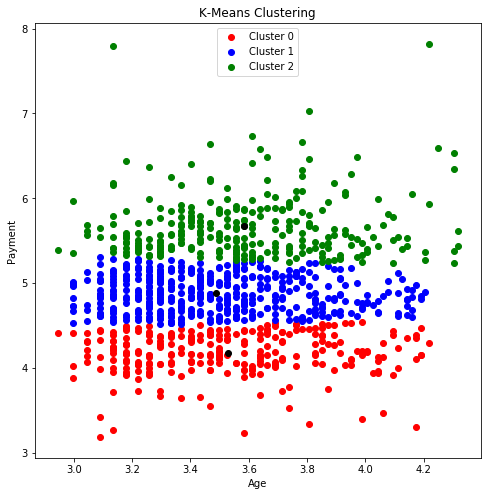

In [161]:
# Visualisasi Hasil
labels=kmeans.labels_
f=plt.figure(figsize=(8,8))
plt.scatter(X[labels==0,0],X[labels==0,1], color='red',label='Cluster 0')
plt.scatter(X[labels==1,0],X[labels==1,1], color='blue',label='Cluster 1')
plt.scatter(X[labels==2,0],X[labels==2,1], color='green',label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.xlabel("Age")
plt.ylabel("Payment")
plt.title("K-Means Clustering")
plt.legend()

In [142]:
# Mengurutkan data berdasarkan clusternya
km=data[['Age','Credit amount','Payment']]
km['Cluster']=pd.DataFrame(kmeans.labels_)
Hasil=km.sort_values(by=['Cluster'])

In [143]:
# Menghitung rata-rata pembayaran tiap bulan dari tiap cluster 
hasil=Hasil.groupby(by='Cluster').mean().round(1)
hasil

,Age,Credit amount,Payment
Cluster,,,
0,35.8,1440.2,66.7
1,34.1,2885.6,134.1
2,37.7,5640.2,318.6


Dapat dilihat bahwa terdapat segmentasi pelanggan yang terbagi menjadi 3 yaitu :
- Cluster 0 (Good Risk) : Pelanggan yang memiliki pembayaran bulanan rendah (rata-rata pembayaran tiap bulan sebesar 66.7) sehingga risiko kredit macet relatif rendah.
- Cluster 1 (Medium Risk) : Pelanggan yang memiliki pembayaran bulanan sedang (rata-rata pembayaran tiap bulan sebesar 134.1) sehingga risiko kredit macet relatif sedang.
- Cluster 2 (Bad Risk) : Pelanggan yang memiliki pembayaran bulanan besar (rata-rata pembayaran tiap bulan sebesar 318.6) sehingga risiko kredit macet relatif tinggi.

### Metode Hierarki
Langkah pertama yang dilakukan dalam metode Hierarki adalah membuat plot dendogram dengan menggunakan 3 jenis linkage yaitu ward, complete, average untuk menentukan model clustering yang akan kita buat.

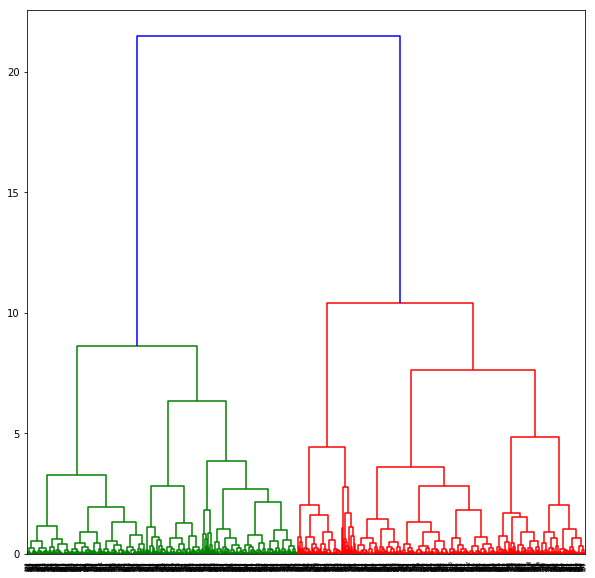

In [47]:
# Membentuk dendogram dengan metode ward 
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

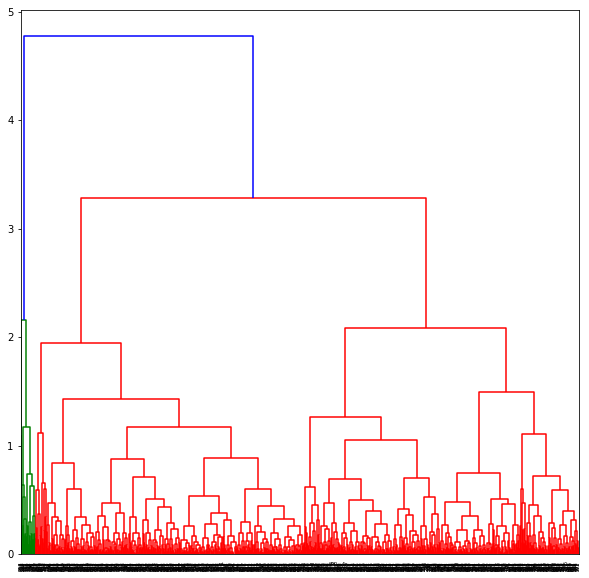

In [153]:
# Membentuk dendogram dengan metode complete
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))

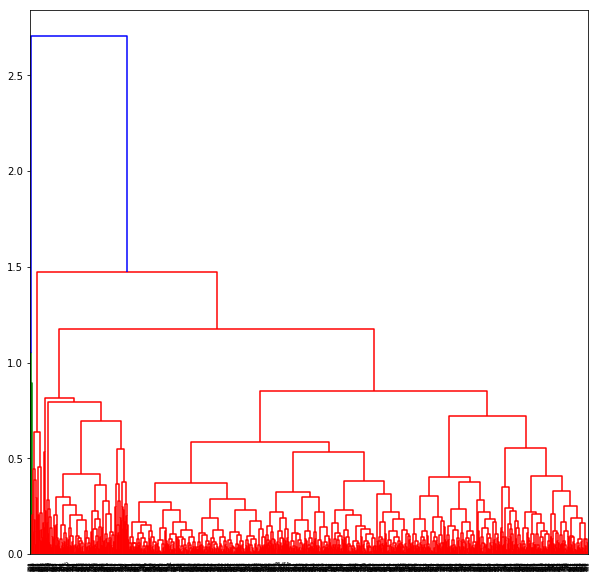

In [154]:
# Membentuk dendogram dengan metode ward 
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(X, method='average'))

Pada metode Hierarki, digunakan linkage 'ward' dikarenakan setelah dicoba dan dibandingkan, linkage 'ward' dapat mengelompokkan data dengan lebih baik dibanding linkage lainnya.

In [164]:
#Melakukan fitting dengan algoritma hierarchical clustering
model=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
preds=model.fit_predict(X)

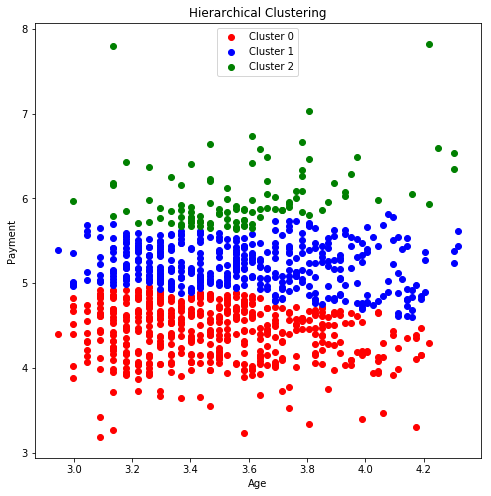

In [165]:
# Mengeplot data setelah dilakukan fitting dengan algoritma hierarchical clustering
labels=model.labels_
f=plt.figure(figsize=(8,8))
plt.scatter(X[labels==0,0],X[labels==0,1], color='red',label='Cluster 0')
plt.scatter(X[labels==1,0],X[labels==1,1], color='blue',label='Cluster 1')
plt.scatter(X[labels==2,0],X[labels==2,1], color='green',label='Cluster 2')
plt.xlabel("Age")
plt.ylabel("Payment")
plt.title("Hierarchical Clustering")
plt.legend()

In [166]:
# Mengurutkan data berdasarkan clusternya
hr=data[['Age','Credit amount','Payment']]
hr['Cluster']=pd.DataFrame(model.labels_)
Hasil=hr.sort_values(by=['Cluster'])

In [167]:
# Menghitung rata-rata pembayaran tiap bulan dari tiap cluster 
hasil=Hasil.groupby(by='Cluster').mean().round(1)
hasil

,Age,Credit amount,Payment
Cluster,,,
0,33.7,1880.7,87.5
1,37.3,4124.5,189.2
2,37.1,6362.7,453.9


Dapat dilihat bahwa terdapat segmentasi pelanggan yang terbagi menjadi 3 yaitu :
- Cluster 0 (Good Risk) : Pelanggan yang memiliki pembayaran bulanan rendah (rata-rata pembayaran tiap bulan sebesar 87.5) sehingga risiko kredit macet relatif rendah.
- Cluster 1 (Medium Risk) : Pelanggan yang memiliki pembayaran bulanan sedang (rata-rata pembayaran tiap bulan sebesar 189.2) sehingga risiko kredit macet relatif sedang.
- Cluster 2 (Bad Risk) : Pelanggan yang memiliki pembayaran bulanan besar (rata-rata pembayaran tiap bulan sebesar 453.9) sehingga risiko kredit macet relatif tinggi.

### Metode DBSCAN

In [173]:
# Melakukan aktivasi algoritma DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=15)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=15, n_jobs=1, p=None)

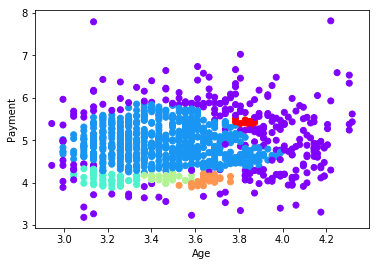

In [174]:
# Visualisasi Hasil
plt.scatter(X[:,0],X[:,1], c=dbscan.labels_, cmap='rainbow')
plt.xlabel("Age")
plt.ylabel("Payment")
#plt.title("Iris with DBSCAN Clustering")
plt.show()

In [175]:
# Mengurutkan data berdasarkan clusternya
db=data[['Age','Credit amount','Payment']]
db['Cluster']=pd.DataFrame(dbscan.labels_)
Hasil=db.sort_values(by=['Cluster'])

In [176]:
# Menghitung rata-rata pembayaran tiap bulan dari tiap cluster 
hasil=Hasil.groupby(by='Cluster').mean()
hasil

,Age,Credit amount,Payment
Cluster,,,
-1,45.823755,4078.494253,243.921339
0,31.953895,3239.001590,152.285239
1,24.625000,1199.625000,60.004275
2,32.346154,1321.769231,61.262607
3,38.538462,1288.230769,57.519895
4,46.200000,4399.700000,226.758568


Perhatikan bahwa, pada metode DBSCAN clustering tidak dapat dilakukan segmentasi pelanggan dengan baik. Hal ini dikarenakan DBSCAN memiliki kelemahan dengan cluster data yang memiliki kepadatan data yang sama.
Sumber : [Medium](https://medium.com/@elutins/dbscan-what-is-it-when-to-use-it-how-to-use-it-8bd506293818)

## 4. Kesimpulan

### Pemilihan Model

Dari ketiga metode yang digunakan dapat dilihat segmentasi pelanggan dari German Credit adalah sebagai berikut :

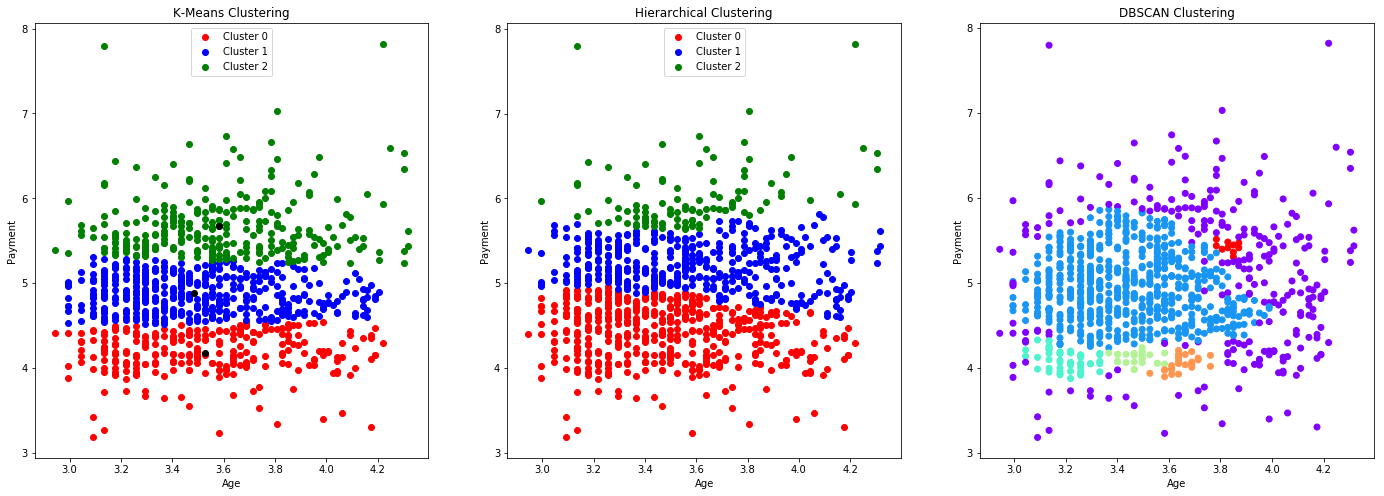

In [187]:
# Visualisasi hasil ketiga metode
f=plt.figure(figsize=(24,8))
f.add_subplot(1,3,1)
labels=kmeans.labels_
plt.scatter(X[labels==0,0],X[labels==0,1], color='red',label='Cluster 0')
plt.scatter(X[labels==1,0],X[labels==1,1], color='blue',label='Cluster 1')
plt.scatter(X[labels==2,0],X[labels==2,1], color='green',label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.xlabel("Age")
plt.ylabel("Payment")
plt.title("K-Means Clustering")
plt.legend()
f.add_subplot(1,3,2)
labels=model.labels_
plt.scatter(X[labels==0,0],X[labels==0,1], color='red',label='Cluster 0')
plt.scatter(X[labels==1,0],X[labels==1,1], color='blue',label='Cluster 1')
plt.scatter(X[labels==2,0],X[labels==2,1], color='green',label='Cluster 2')
plt.xlabel("Age")
plt.ylabel("Payment")
plt.title("Hierarchical Clustering")
plt.legend()
f.add_subplot(1,3,3)
plt.scatter(X[:,0],X[:,1], c=dbscan.labels_, cmap='rainbow')
plt.xlabel("Age")
plt.ylabel("Payment")
plt.title("DBSCAN Clustering")
plt.show()

Dari ketiga metode diatas, dipilih metode K-Means Clustering untuk membuat segmentasi pelanggan German Credit. Hal ini dikarenakan metode K-Means menghasilkan klaster yang lebih rapat daripada klaster hierarkis sehingga membuat segmentasi lebih berimbang. 

### Segmentasi pelanggan dari German Credit

Dari metode K-Means diatas diperoleh segmentasi pelanggan dari German Credit sebagai berikut :
- Cluster 0 (Good Risk) : Pelanggan yang memiliki pembayaran bulanan rendah (rata-rata pembayaran tiap bulan sebesar 66.7) sehingga risiko kredit macet relatif rendah.
- Cluster 1 (Medium Risk) : Pelanggan yang memiliki pembayaran bulanan sedang (rata-rata pembayaran tiap bulan sebesar 134.1) sehingga risiko kredit macet relatif sedang.
- Cluster 2 (Bad Risk) : Pelanggan yang memiliki pembayaran bulanan besar (rata-rata pembayaran tiap bulan sebesar 318.6) sehingga risiko kredit macet relatif tinggi.

### Business insight untuk German Credit

Dari segmentasi pelanggan yang telah dilakukan, dapat dilakukan beberapa langkah yang dapat dipertimbangkan oleh German Credit :
1. Dalam memberikan kredit kepada pelanggan, hendaknya German Credit memperhatikan kemampuan pembayaran pelanggan tiap bulannya. Perhatikan pula besarnya pinjaman dibandingkan dengan durasi waktu pembayaran yang menentukan besarnya pembayaran tiap bulan pelanggan sebelum memberikan pinjaman. Hal ini dimaksudkan untuk mengurangi risiko dari adanya kredit macet yang terjadi pada segmentasi pelanggan pada cluster 2. 
2. Memberikan perhatian yang lebih khusus dan ekstra pada pelanggan yang berada pada cluster 2 sehingga risiko adanya kredit macet dapat lebih diantisipasi.
3. Memberikan promo berupa reward/hadiah kepada pelanggan sehingga dapat memotivasi agar pelanggan selalu membayar kreditnya tepat waktu. Besarnya reward/ hadiah disesuaikan berdasarkan segmentasi pelanggan yang sudah dibuat.